# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

In [1]:
%pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing2/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing2'

# Load collected data

In [5]:
# import all necessary packages and libraries for the notebook
import os
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
sns.set(style="whitegrid")


In [7]:
import pandas as pd

# Corrected file path
df_raw_path = "jupyter_notebooks/outputs/datasets/collection/HousePrices.csv"

# Read the CSV file
df = pd.read_csv(df_raw_path)

# Display the first 5 rows
df.head(5)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       856     854.0           3.0           No         706          GLQ   
1      1262       0.0           3.0           Gd         978          ALQ   
2       920     866.0           3.0           Mn         486          GLQ   
3       961       NaN           NaN           No         216          ALQ   
4      1145       NaN           4.0           Av         655          GLQ   

   BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotFrontage  \
0        150            0.0         548          RFn  ...         65.0   
1        284            NaN         460          RFn  ...         80.0   
2        434            0.0         608          RFn  ...         68.0   
3        540            NaN         642          Unf  ...         60.0   
4        490            0.0         836          RFn  ...         84.0   

   MasVnrArea OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  WoodDeckSF  \
0       196.0          61            5            7          856         0.0   
1         0.0           0            8            6         1262         NaN   
2       162.0          42            5            7          920         NaN   
3         0.0          35            5            7          756         NaN   
4       350.0          84            5            8         1145         NaN   

   YearBuilt  YearRemodAdd  SalePrice  
0       2003          2003     208500  
1       1976          1976     181500  
2       2001          2002     223500  
3       1915          1970     140000  
4       2000          2000     250000  

[5 rows x 24 columns]

In [8]:
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:]
corr_spearman

OverallQual      0.809829
GrLivArea        0.731310
YearBuilt        0.652682
GarageArea       0.649379
TotalBsmtSF      0.602725
GarageYrBlt      0.593788
1stFlrSF         0.575408
YearRemodAdd     0.571159
OpenPorchSF      0.477561
LotArea          0.456461
MasVnrArea       0.421309
LotFrontage      0.409076
BsmtFinSF1       0.301871
2ndFlrSF         0.298809
WoodDeckSF       0.252176
BedroomAbvGr     0.229527
EnclosedPorch   -0.215010
BsmtUnfSF        0.185197
OverallCond     -0.129325
Name: SalePrice, dtype: float64

In [10]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:]
corr_pearson

OverallQual      0.790982
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
BsmtFinSF1       0.386420
LotFrontage      0.351799
2ndFlrSF         0.322335
OpenPorchSF      0.315856
LotArea          0.263843
WoodDeckSF       0.252027
BsmtUnfSF        0.214479
EnclosedPorch   -0.176458
BedroomAbvGr     0.161901
OverallCond     -0.077856
Name: SalePrice, dtype: float64

In [11]:
def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)


In [12]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%   75%    max
ppscore  552.0  0.055  0.104  0.0  0.0  0.0  0.06  0.702




* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



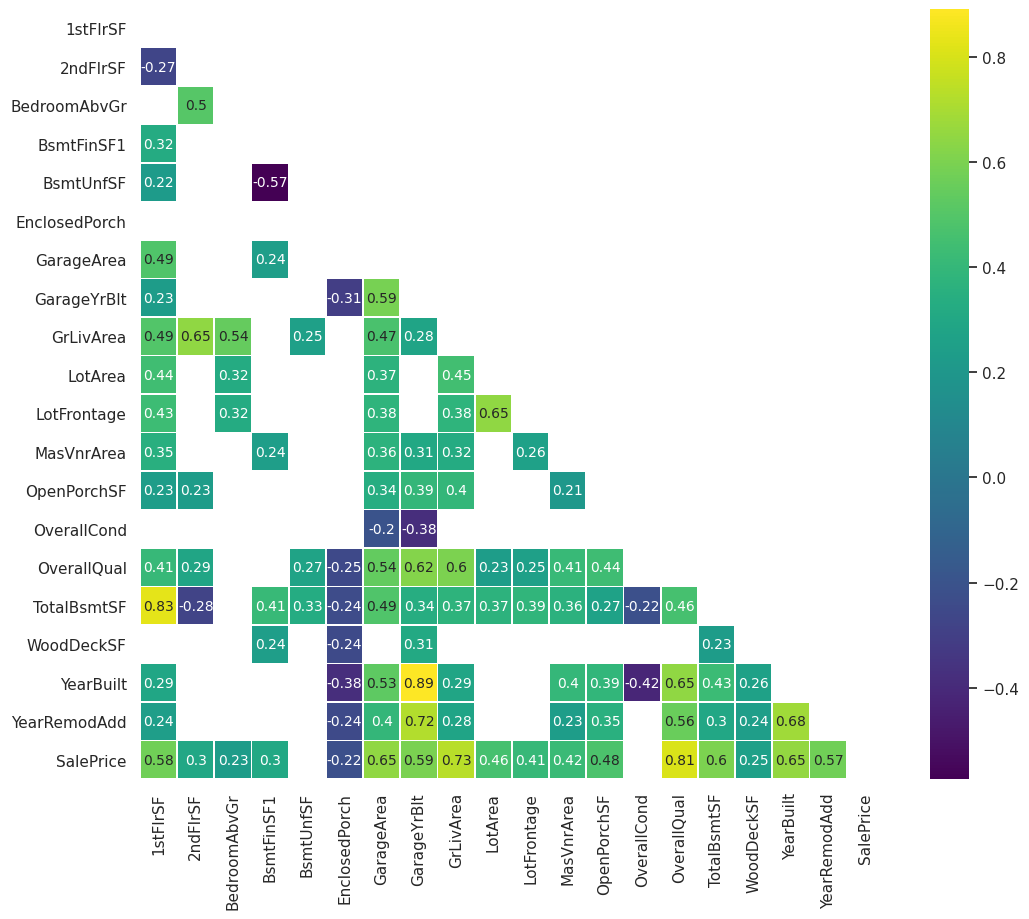



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



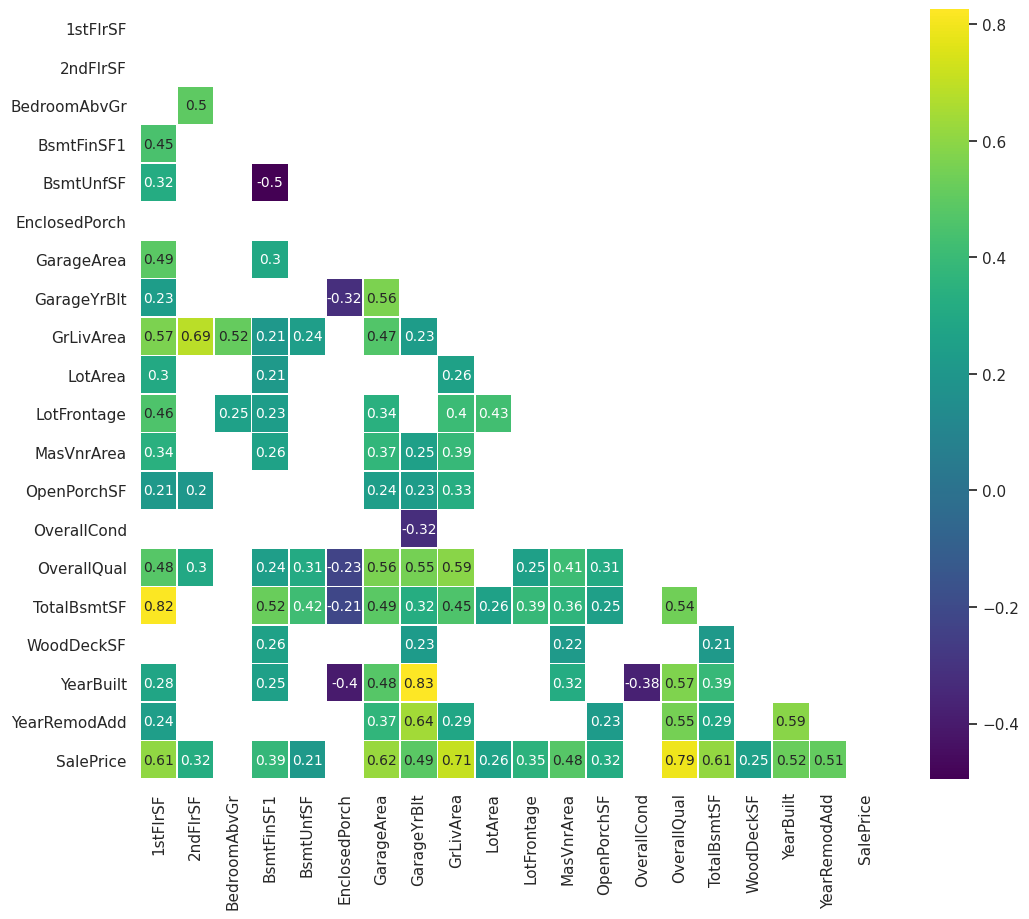



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



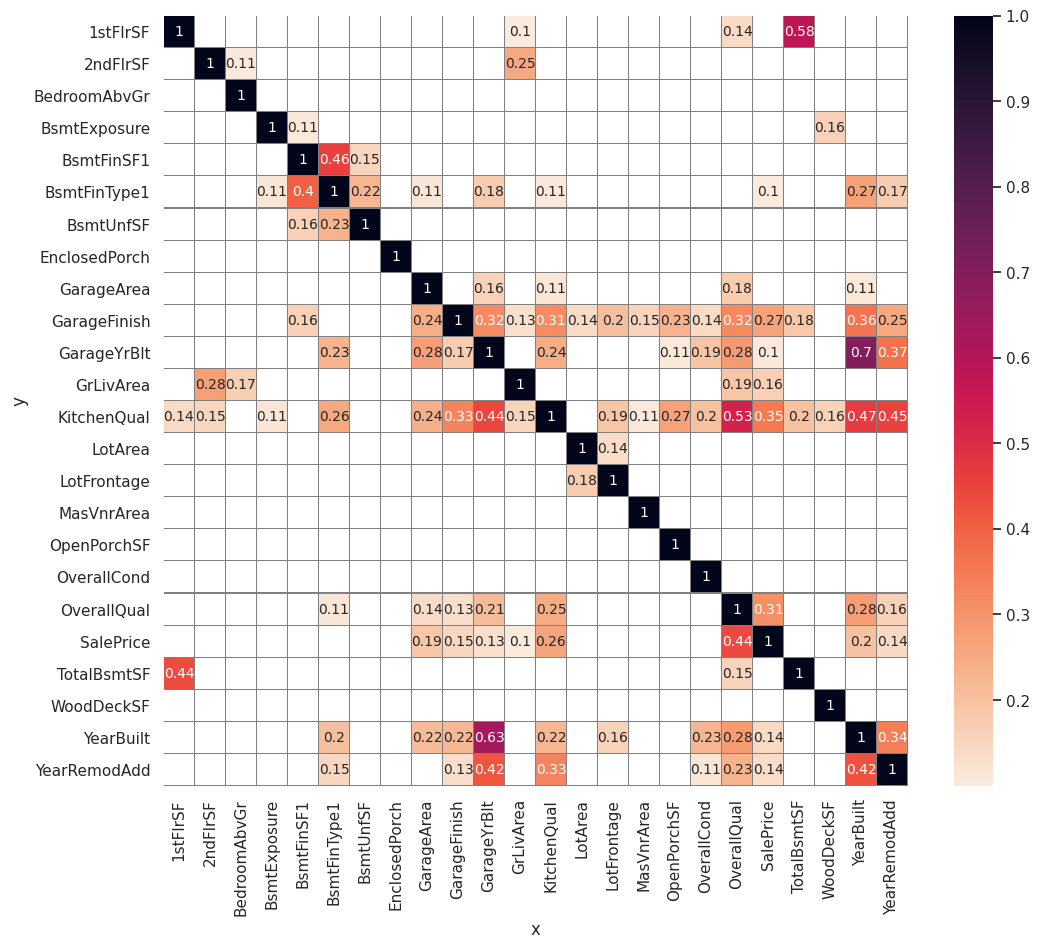

In [13]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman,
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.2, PPS_Threshold = 0.1,
                  figsize=(12,10), font_annot = 10)

In [ ]:
import matplotlib.pyplot as plt

# Filter out rows where GarageArea is missing
df_with_garage = df[df['GarageArea'].notnull()]

# Plot sale price against garage area
plt.figure(figsize=(10, 6))
plt.scatter(df_with_garage['GarageArea'], df_with_garage['SalePrice'], alpha=0.5)
plt.title('Sale Price vs. Garage Area')
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

* We can see that even properties without garage and a small garage is a small difference in price, meaning that small garage seems to be priced in principle as without a garage.

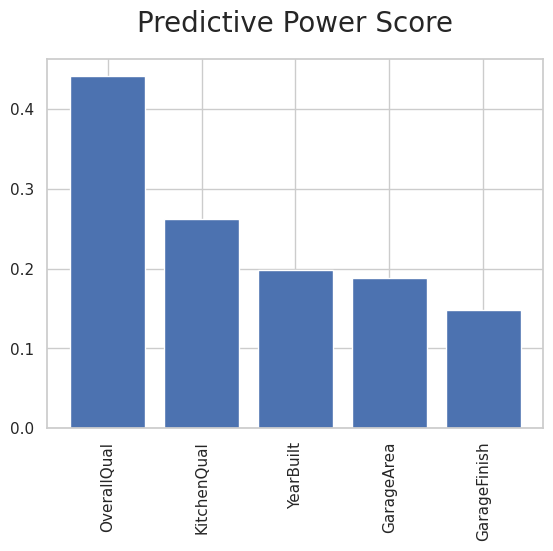

In [14]:
# pps_saleprice = pps_matrix.iloc["SalePrice"]
pps_topscores = pps_matrix.iloc[19].sort_values(key=abs, ascending=False)[1:6]
plt.bar(x=pps_topscores.index, height=pps_topscores)
plt.xticks(rotation=90)
plt.title("Predictive Power Score", fontsize=20, y=1.05)
plt.show()

In [15]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:]
corr_spearman

OverallQual      0.809829
GrLivArea        0.731310
YearBuilt        0.652682
GarageArea       0.649379
TotalBsmtSF      0.602725
GarageYrBlt      0.593788
1stFlrSF         0.575408
YearRemodAdd     0.571159
OpenPorchSF      0.477561
LotArea          0.456461
MasVnrArea       0.421309
LotFrontage      0.409076
BsmtFinSF1       0.301871
2ndFlrSF         0.298809
WoodDeckSF       0.252176
BedroomAbvGr     0.229527
EnclosedPorch   -0.215010
BsmtUnfSF        0.185197
OverallCond     -0.129325
Name: SalePrice, dtype: float64

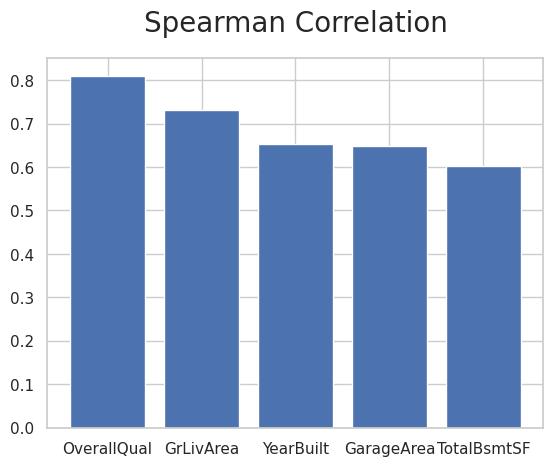

In [16]:
plt.bar(x=corr_spearman[:5].index, height=corr_spearman[:5])
plt.title("Spearman Correlation", fontsize=20, y=1.05)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined and contains the relevant columns
df_missing = df.copy()
df_missing['GarageFinish'] = df_missing['GarageFinish'].fillna('Missing')

# Descriptive statistics for GarageArea
garage_area_stats = df_missing['GarageArea'].describe()
print(garage_area_stats)

# Plotting a histogram for GarageArea
plt.figure(figsize=(10, 6))
sns.histplot(df_missing['GarageArea'], bins=20, kde=True)
plt.title('Distribution of GarageArea')
plt.xlabel('GarageArea')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined and contains the relevant columns
df_missing = df.copy()
df_missing['GarageFinish'] = df_missing['GarageFinish'].fillna('Missing')

# Define the bin edges
bin_edges = np.arange(0, 1601, 100)

# Create a new column with GarageArea binned
df_missing['GarageArea_bins'] = pd.cut(df_missing['GarageArea'], bins=bin_edges)

# Calculate the average SalePrice for each bin
bin_price_avg = df_missing.groupby('GarageArea_bins')['SalePrice'].mean()

# Plot the correlation between GarageArea bins and average SalePrice
plt.figure(figsize=(10, 6))
sns.barplot(x=bin_price_avg.index, y=bin_price_avg.values, palette='viridis')
plt.title('Average SalePrice by GarageArea (Grouped by 100 sqft)')
plt.xlabel('GarageArea (sqft)')
plt.ylabel('Average SalePrice')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the mean SalePrice for each bin of GarageArea
bin_price_avg = df_missing.groupby('GarageArea_bins')['SalePrice'].mean()

# Calculate the correlation coefficient between GarageArea bins and average SalePrice
correlation = bin_price_avg.corr(pd.Series(bin_price_avg.index.codes, index=bin_price_avg.index), method='pearson')

print("Correlation between GarageArea (grouped by 100 sqft) and SalePrice:", correlation)

In [17]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:]
corr_pearson

OverallQual      0.790982
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
BsmtFinSF1       0.386420
LotFrontage      0.351799
2ndFlrSF         0.322335
OpenPorchSF      0.315856
LotArea          0.263843
WoodDeckSF       0.252027
BsmtUnfSF        0.214479
EnclosedPorch   -0.176458
BedroomAbvGr     0.161901
OverallCond     -0.077856
Name: SalePrice, dtype: float64

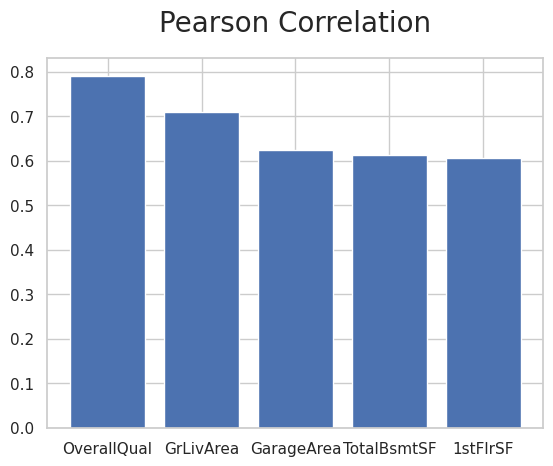

In [18]:
plt.bar(x=corr_pearson[:5].index, height=corr_pearson[:5])
plt.title("Pearson Correlation", fontsize=20, y=1.05)
plt.show()

In [19]:
top_n = 5
vars_to_study = set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())
vars_to_study

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

In [20]:
df_eda = df.filter(list(vars_to_study) + ['SalePrice'])
df_eda.head(3)

YearBuilt  GarageArea  OverallQual  TotalBsmtSF  GrLivArea  1stFlrSF  \
0       2003         548            7          856       1710       856   
1       1976         460            6         1262       1262      1262   
2       2001         608            7          920       1786       920   

   SalePrice  
0     208500  
1     181500  
2     223500

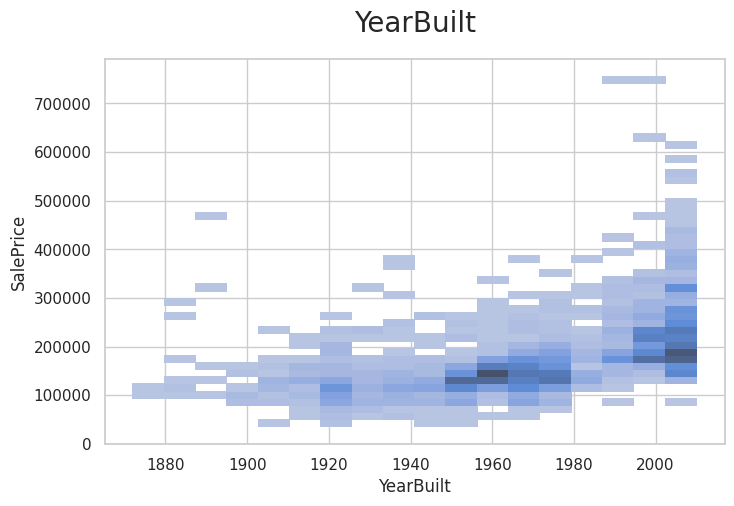

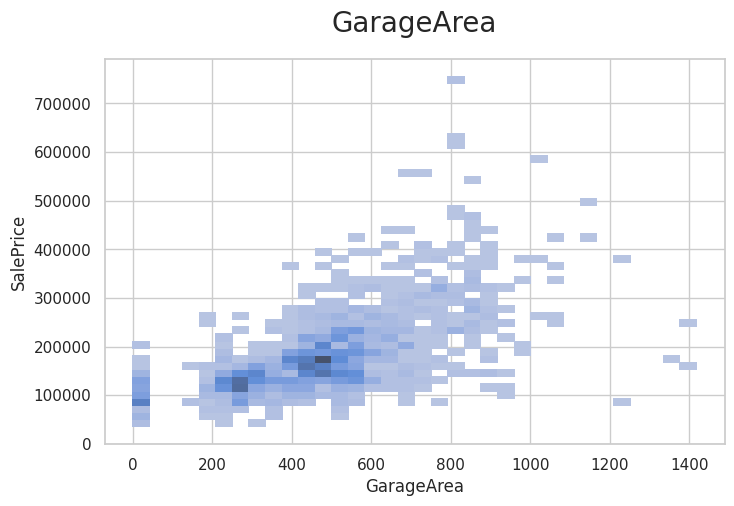

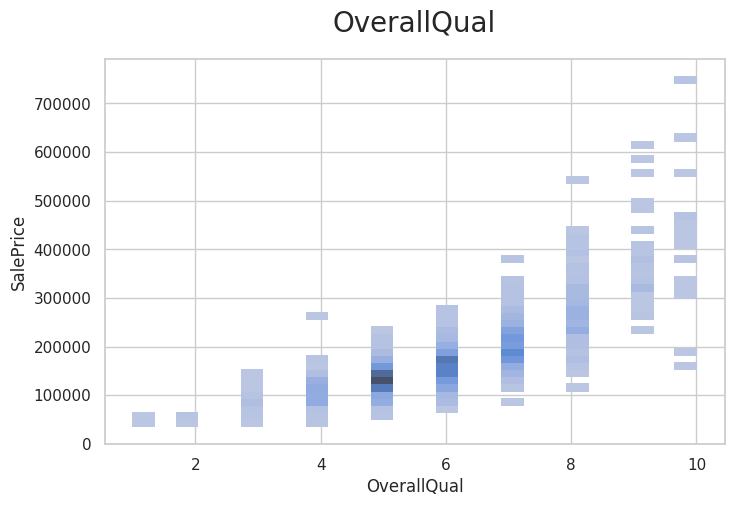

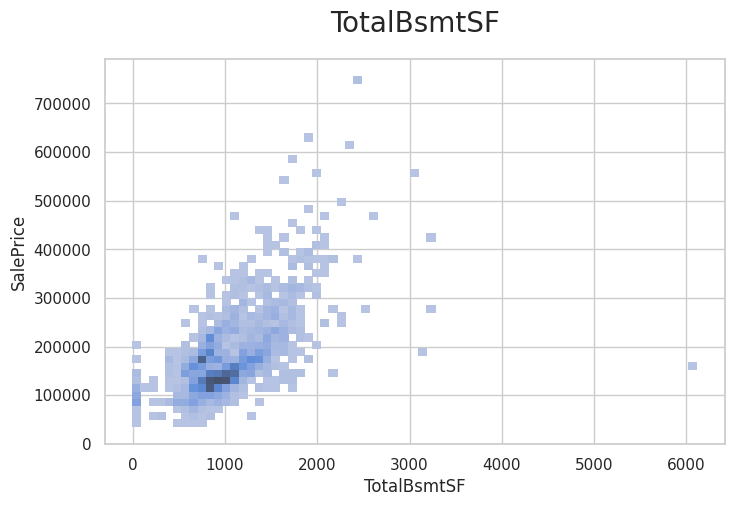

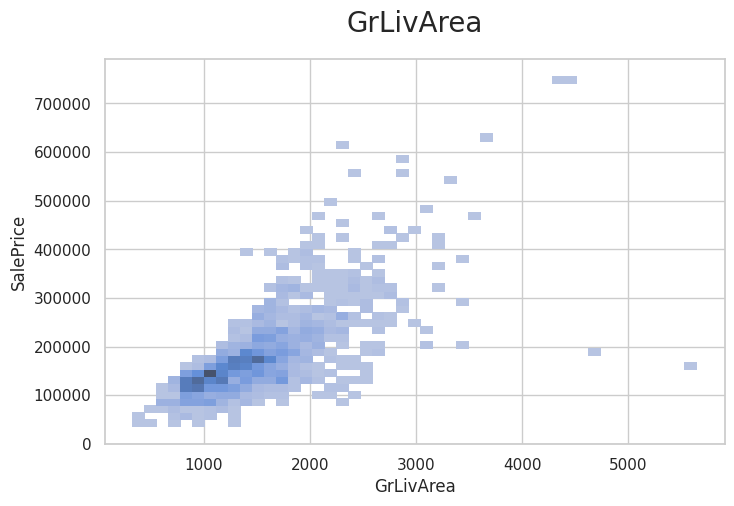

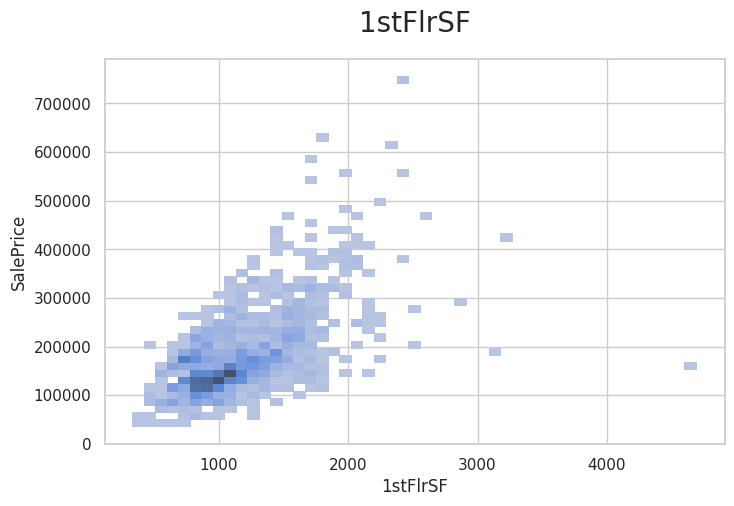

In [21]:
def correlation_to_sale_price_hist(df, vars_to_study):
    """ Display correlation plot between variables and sale price """
    target_var = 'SalePrice'
    for col in vars_to_study:
        fig, axes = plt.subplots(figsize=(8, 5))
        axes = sns.histplot(data=df, x=col, y=target_var)
        plt.title(f"{col}", fontsize=20, y=1.05)
        plt.show()
        print("\n\n")

correlation_to_sale_price_hist(df_eda, vars_to_study)

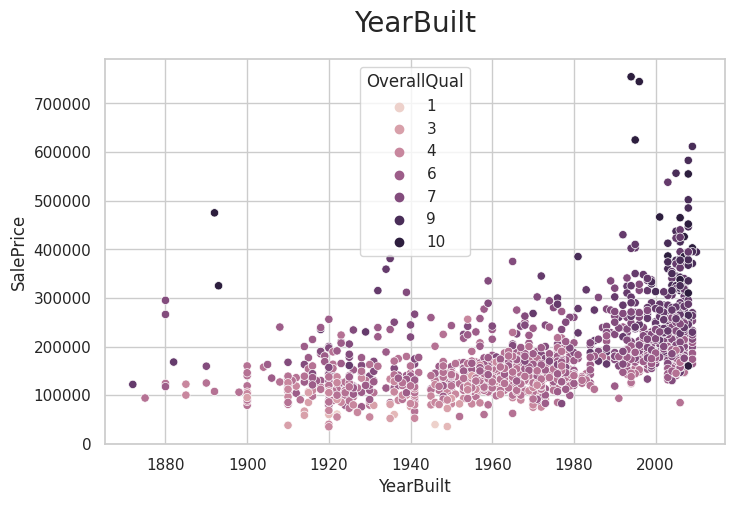

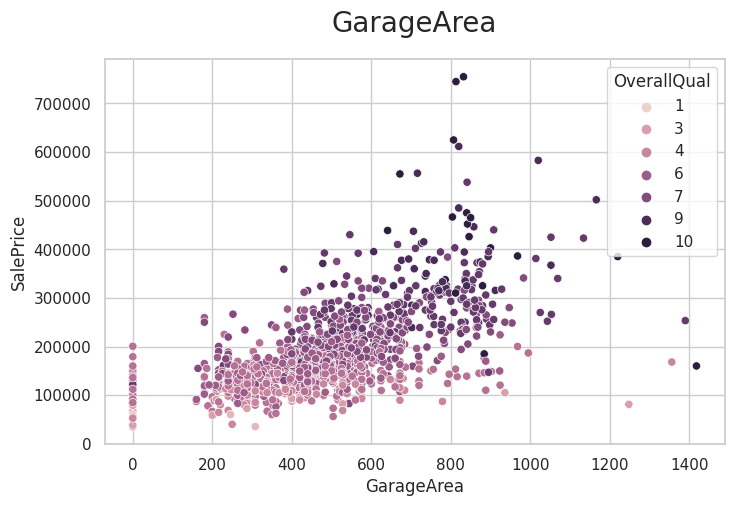

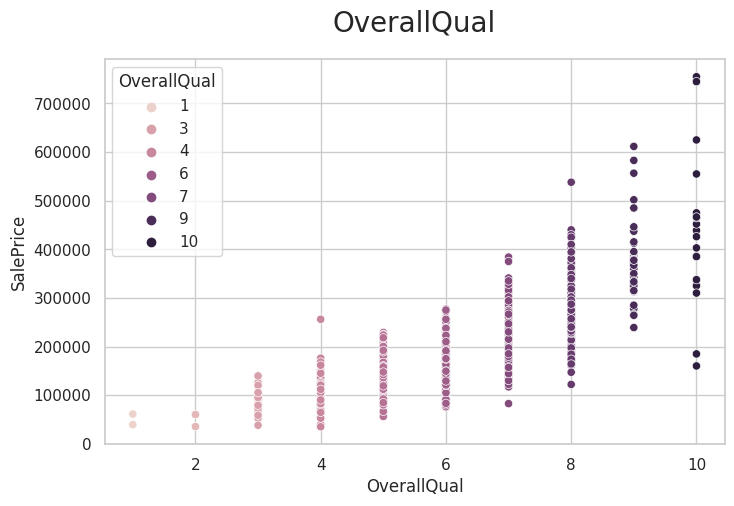

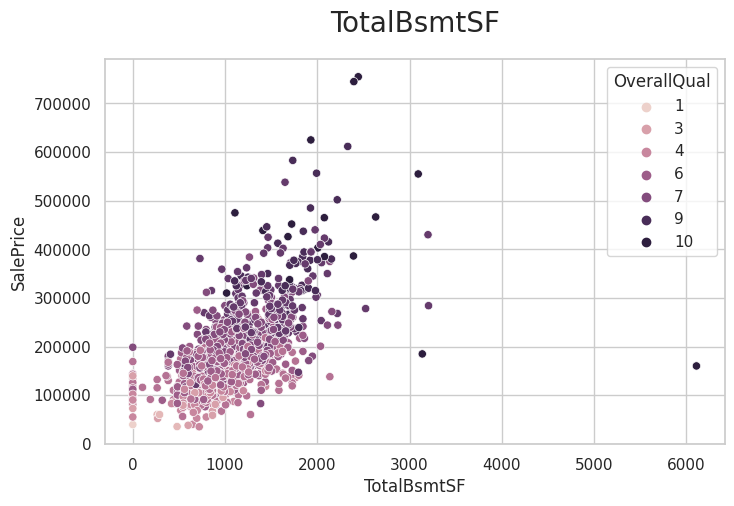

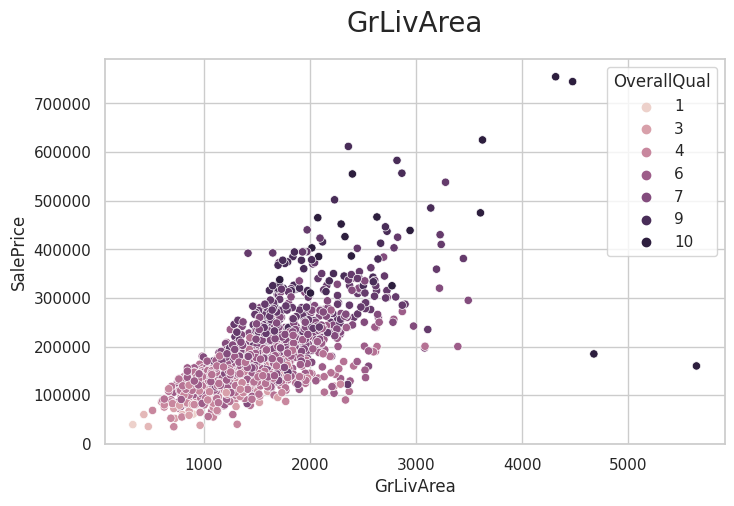

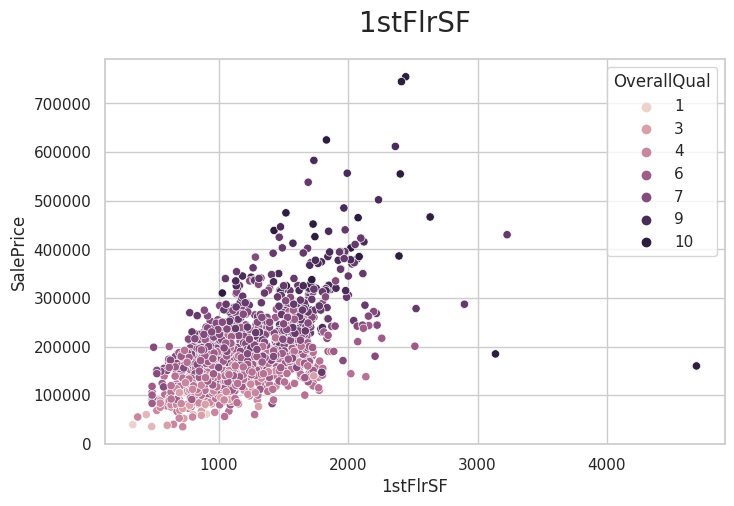

In [22]:
def correlation_to_sale_price_scat(df, vars_to_study):
    """  scatterplots of variables vs SalePrice """
    target_var = 'SalePrice'
    for col in vars_to_study:
        fig, axes = plt.subplots(figsize=(8, 5))
        axes = sns.scatterplot(data=df, x=col, y=target_var, hue='OverallQual')
        plt.title(f"{col}", fontsize=20, y=1.05)
        plt.show()
        print("\n\n")

correlation_to_sale_price_scat(df_eda, vars_to_study)

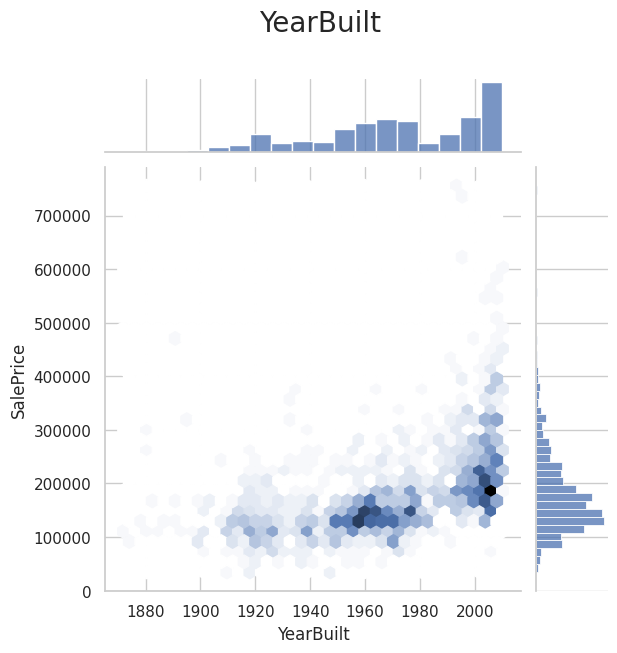

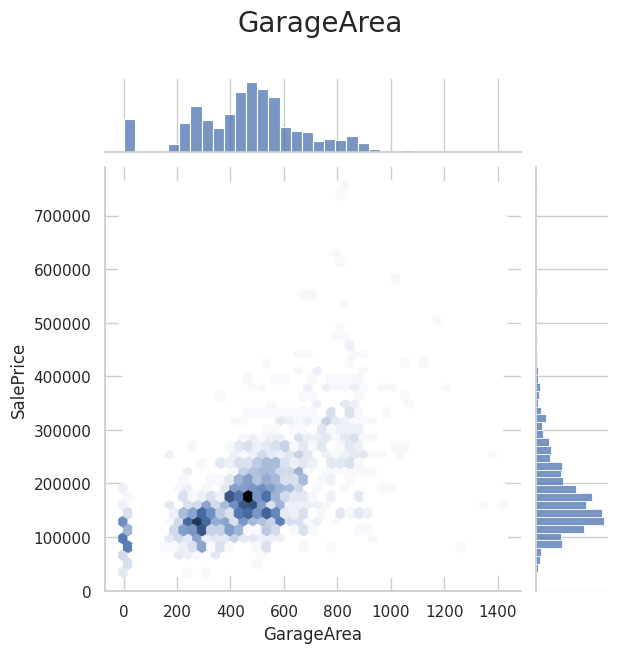

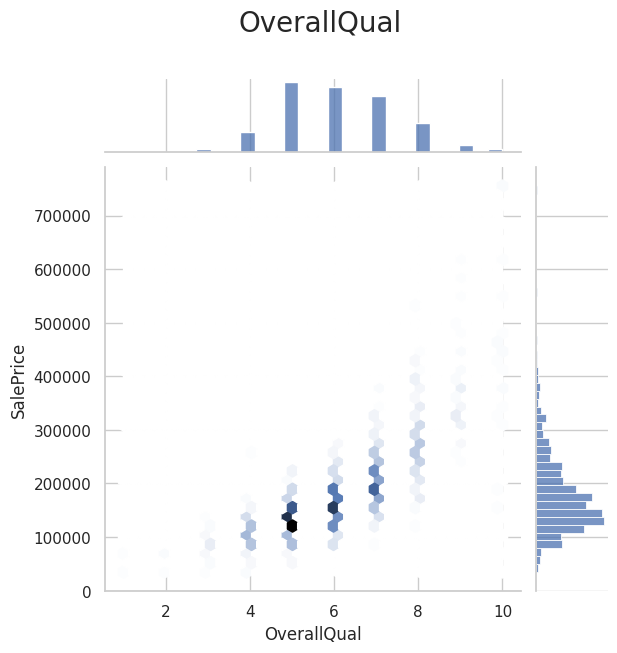

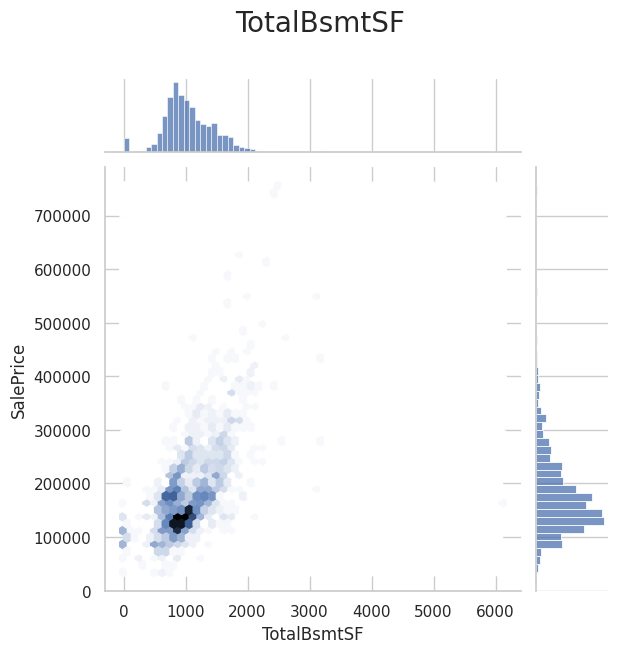

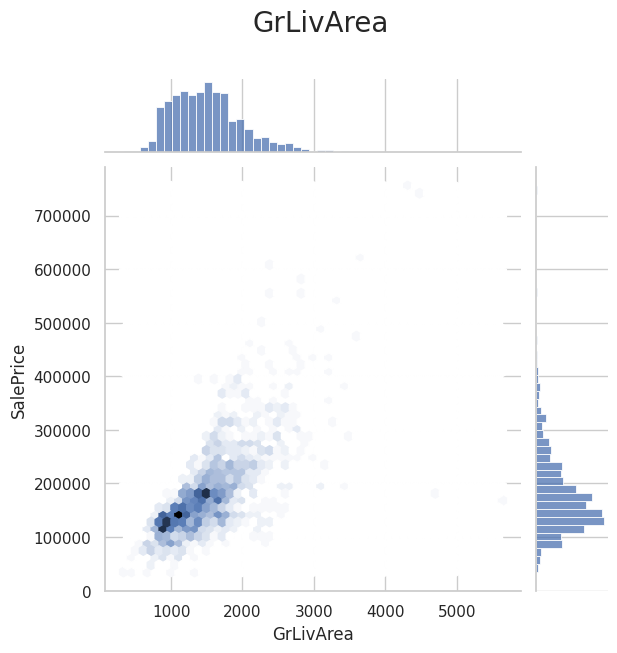

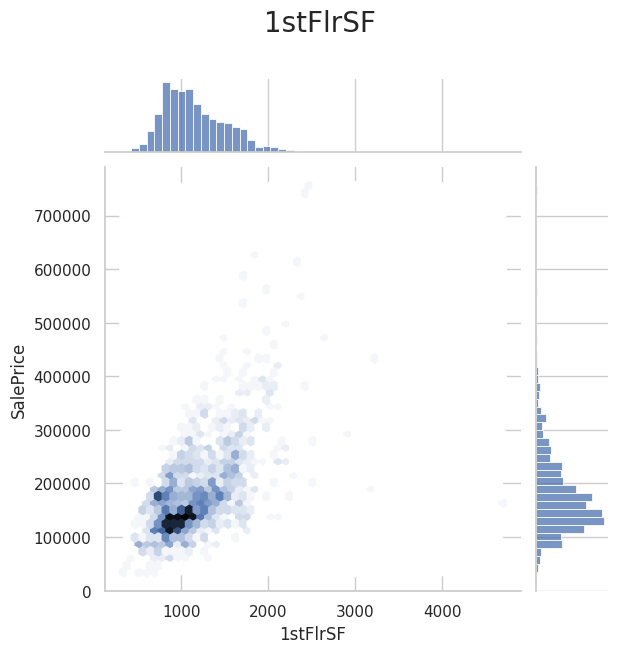

In [23]:
def correlation_to_sale_price_joint(df, vars_to_study):
    """  Joint plots of variables vs SalePrice """
    target_var = 'SalePrice'
    for col in vars_to_study:
        x, y, hue = col, target_var, 'OverallQual'
        sns.jointplot(data=df, x=x, y=y, kind='hex')
        # sns.jointplot(data=df, x=x, y=y, hue=hue)
        plt.title(f"{col}", fontsize=20, y=1.3, x=-3)
        plt.show()
        print("\n\n")


correlation_to_sale_price_joint(df_eda, vars_to_study)

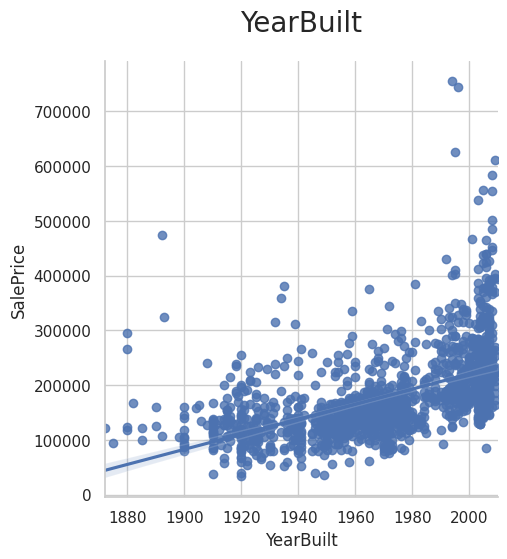

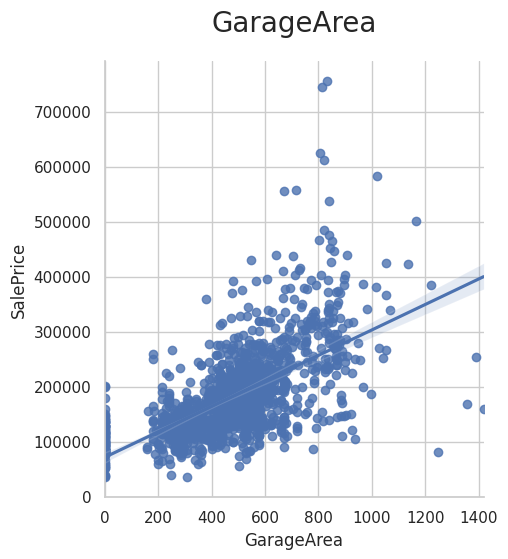

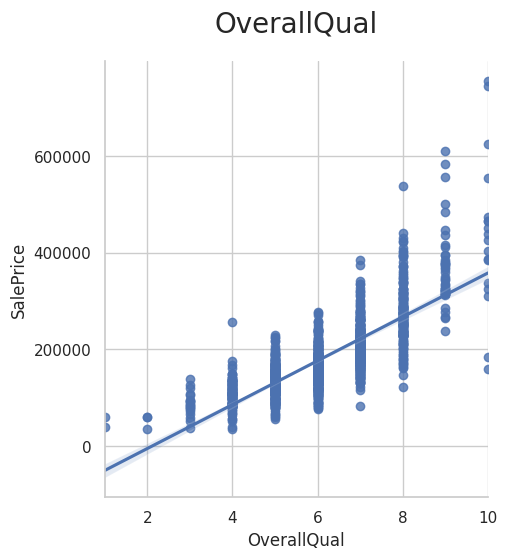

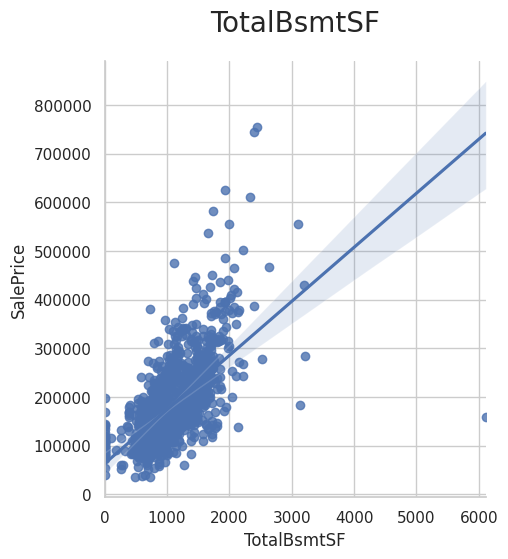

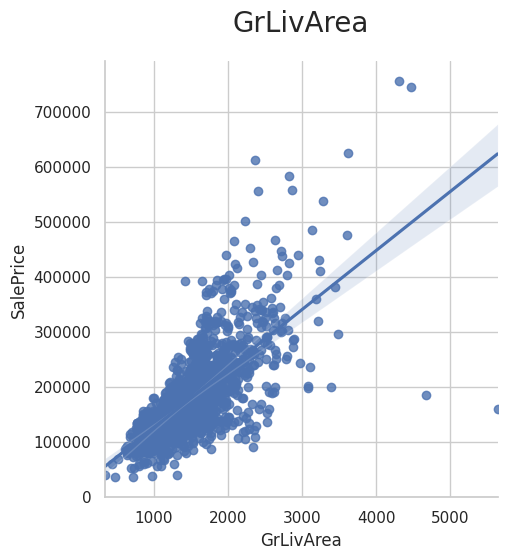

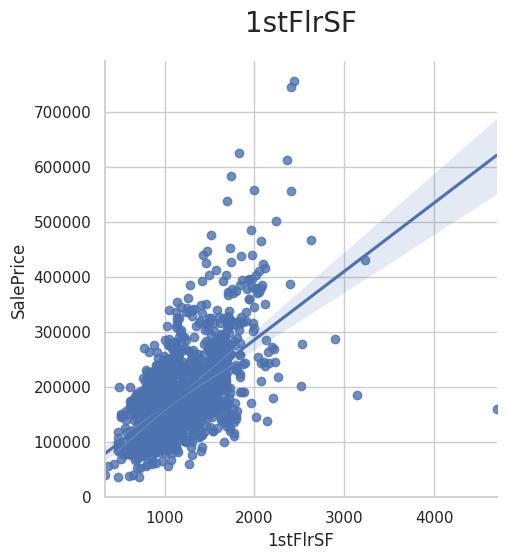

In [24]:
def correlation_to_sale_price_lm(df, vars_to_study):
    """  Joint plots of variables vs SalePrice """
    target_var = 'SalePrice'
    for col in vars_to_study:
        # fig, axes = plt.subplots(figsize=(8, 5))
        sns.lmplot(data=df, x=col, y=target_var)
        plt.title(f"{col}", fontsize=20, y=1.05)
        plt.show()
        print("\n\n")

correlation_to_sale_price_lm(df_eda, vars_to_study)

Section 1 content

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your original dataframe
df_missing = df.copy()
df_missing['BsmtExposure'] = df_missing['BsmtExposure'].fillna('Missing')
df_missing['BsmtFinType1'] = df_missing['BsmtFinType1'].fillna('Missing')

# Calculate the mean SalePrice for each BsmtExposure category
mean_saleprice = df_missing.groupby('BsmtExposure')['SalePrice'].mean().reset_index()

# Pivot the dataframe for the heatmap
pivot_table = mean_saleprice.pivot("BsmtExposure", "SalePrice", "SalePrice")

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Average Sale Price by BsmtExposure')
plt.show()

---

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your original dataframe
df_missing = df.copy()
df_missing['BsmtExposure'] = df_missing['BsmtExposure'].fillna('Missing')

# One-hot encode BsmtExposure
df_encoded = pd.get_dummies(df_missing, columns=['BsmtExposure'], drop_first=True)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Extract the correlations with SalePrice
correlation_with_saleprice = correlation_matrix['SalePrice'].drop('SalePrice')

# Plot the correlations with SalePrice
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_saleprice.values, y=correlation_with_saleprice.index, palette="viridis")
plt.title('Correlation of BsmtExposure Encoded Variables with SalePrice')
plt.xlabel('Correlation coefficient')
plt.ylabel('Encoded Variables')
plt.show()

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
